# 03_03: Indexing and slicing

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
monalisa = np.load('monalisa.npy')

In [3]:
monalisa.shape

(1198, 804, 3)

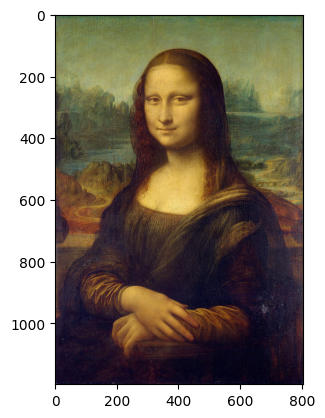

In [4]:
pp.imshow(monalisa)

In [ ]:
monalisa[600, 400, 0] # get red component
# post-version 2 of numpy the dtype is displayed explicitly
# the dtype is np.uint8 which is an unsigned 8-bit integer

247

In [ ]:
# can convert numpy numbers to standard python objects with the constructors int or float
int(monalisa[600, 400, 0]), float(monalisa[600, 400, 0]) 

(247, 247.0)

In [ ]:
monalisa[-50, -50, 1] # pixels in bottom right corner

11

In [10]:
monalisa[1198 - 50, 804 - 50, 1], monalisa[1148, 754, 1]

(11, 11)

In [11]:
monalisa[1000, 900, 2] # out of bounds

IndexError: index 900 is out of bounds for axis 1 with size 804

In [12]:
monalisa[600, 400, 0] = monalisa[600, 400, 1] = monalisa[600, 400, 2] = 0 # assign values

In [ ]:
just_a_list = [[1,2,3],[4,5,6],[7,8,9]] 

In [14]:
just_a_list[1,2] # can't use same apprach for lists of lists

TypeError: list indices must be integers or slices, not tuple

In [15]:
just_a_list[1] # need to first extract a list / entire row

[4, 5, 6]

In [16]:
just_a_list[1][2] # then the element

6

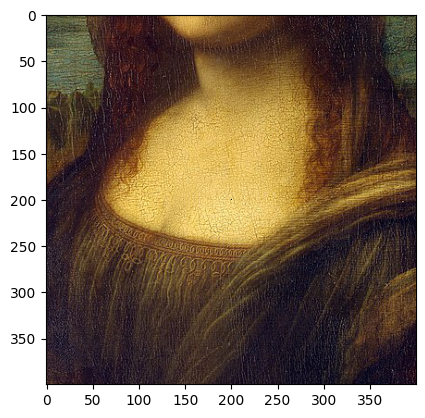

In [ ]:
pp.imshow(monalisa[400:800, 200:600, 0:3]) # slicing

In [ ]:
pp.imshow(monalisa[800:, :, :]) # default to eng/start, lonely colon grab entire dimension

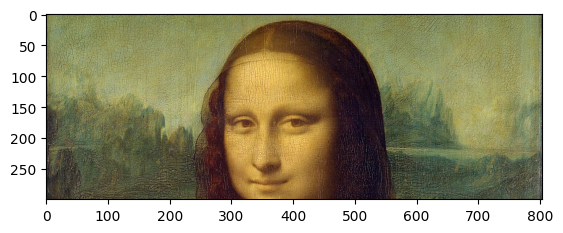

In [18]:
pp.imshow(monalisa[100:400, ...])

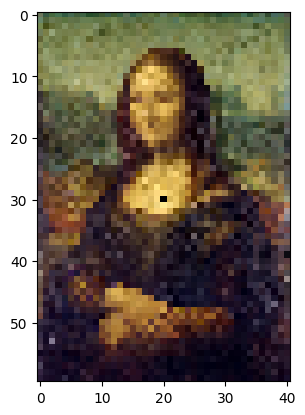

In [20]:
pp.imshow(monalisa[::20, ::20, :]) # step through every 20th pixel

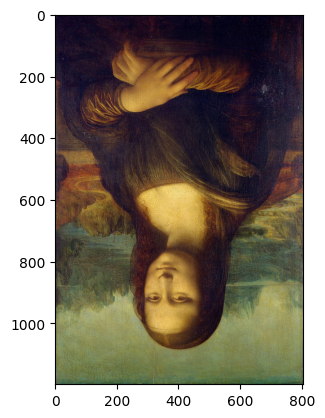

In [ ]:
pp.imshow(monalisa[::-1, :, :]) # slicing backwadr creates a reflection

In [ ]:
row = monalisa[20, ::20, 0] # fixing indices and combing with slicing reduces the dimension

In [23]:
row.shape

(41,)

In [24]:
row

array([104,  81, 107, 100,  90,  98,  94, 103, 103,  97,  99, 105, 116,
       100,  90,  97,  85,  97,  93,  97, 104,  94,  85, 112,  92,  98,
        88,  81, 106,  79,  80,  91,  82, 100, 104,  88,  88,  79,  81,
        81,  88], dtype=uint8)

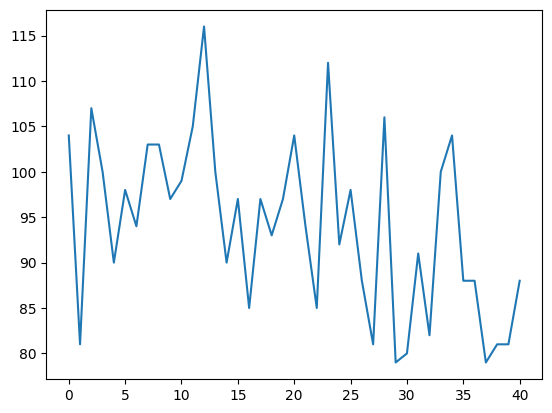

In [25]:
pp.plot(row)

In [26]:
rect = monalisa[20:21, ::20, 0] # taking a slice of 1 however preserves the dimensionality

In [27]:
rect

array([[104,  81, 107, 100,  90,  98,  94, 103, 103,  97,  99, 105, 116,
        100,  90,  97,  85,  97,  93,  97, 104,  94,  85, 112,  92,  98,
         88,  81, 106,  79,  80,  91,  82, 100, 104,  88,  88,  79,  81,
         81,  88]], dtype=uint8)

In [28]:
rect.shape

(1, 41)

In [ ]:
monalisa[20:300, 20:300, :] = 200 #slicing on LHS to modify elements in bulk

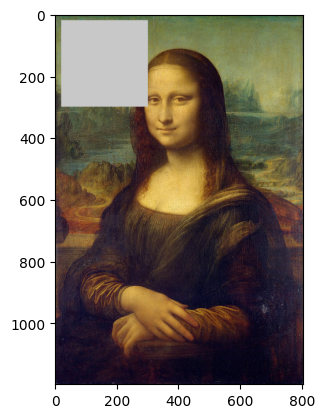

In [30]:
pp.imshow(monalisa)

In [31]:
monalisa[20:300, 20:300, :] = np.random.randint(100, 255, size=(280, 280, 3))

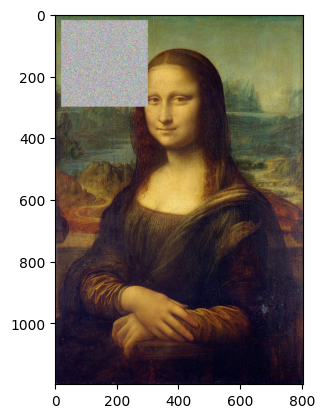

In [32]:
pp.imshow(monalisa)

In [33]:
monalisa_bw = np.loadtxt('monalisa.txt')

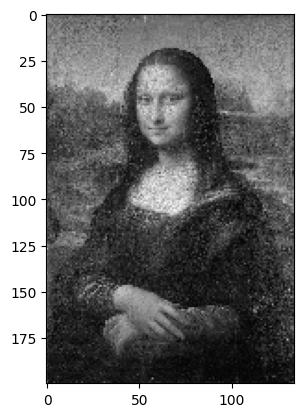

In [34]:
pp.imshow(monalisa_bw, cmap='gray')

In [ ]:
monalisa_bw < 120 # boolean array

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [36]:
monalisa_bw[monalisa_bw < 120] = 0 # threshhold the image zeroing out about the 50% darkest grey pixels 

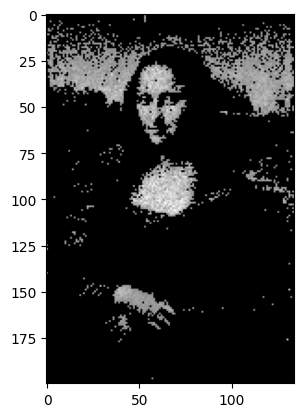

In [37]:
pp.imshow(monalisa_bw, cmap='gray')

In [39]:
mylist = [0,1,2,3,4,5] # slicing a list makes a copy of it

In [40]:
myslice = mylist[0:4]

In [41]:
myslice[2] = myslice[3] = 100

In [42]:
myslice

[0, 1, 100, 100]

In [43]:
mylist

[0, 1, 2, 3, 4, 5]

In [ ]:
monaslice = monalisa[:, 300:500, :] 
# slice of a numpy array is a new object pointing to same place in memory 
# so modifying it will modify the original

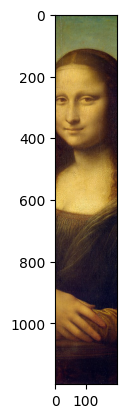

In [45]:
pp.imshow(monaslice)

In [46]:
monaslice[:,:,:] //= 3 # integer-divide by three in place

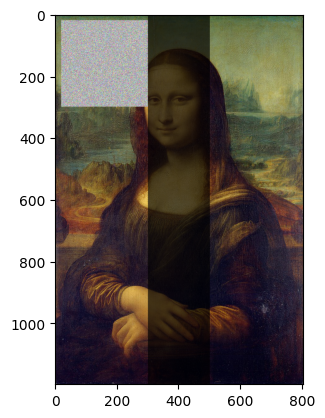

In [47]:
pp.imshow(monalisa)

In [ ]:
monacopy = monalisa_bw.copy() # nned to make explicit new copies of numpy arrays